In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [5]:

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")  # Replace with your filename

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# 1. Generate summary statistics
print("\nSummary statistics:")
print(df.describe())

print("\nMedian of numeric features:")
print(df.median(numeric_only=True))

print("\nStandard deviation of numeric features:")
print(df.std(numeric_only=True))


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450


Generating histograms and boxplots...


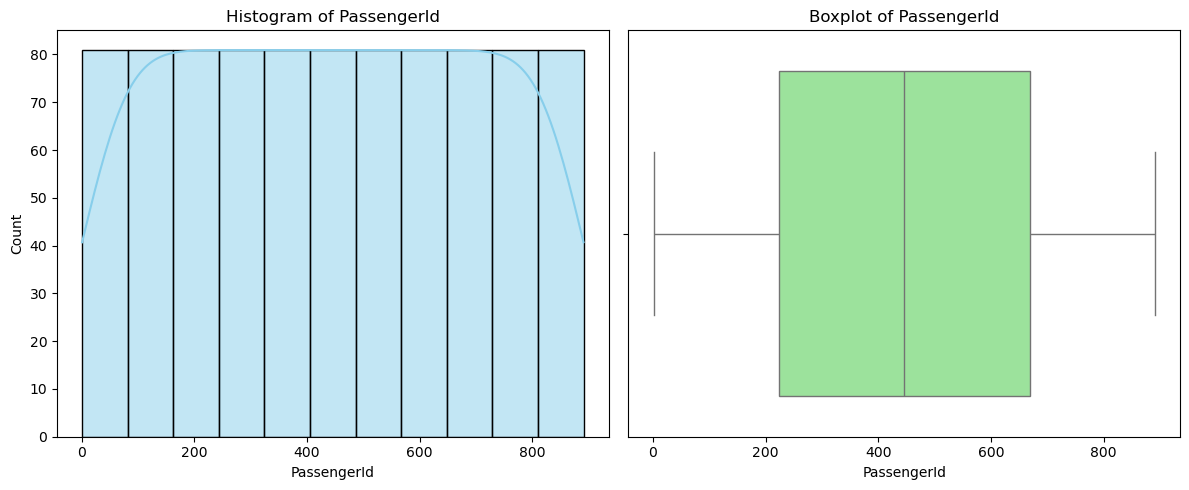

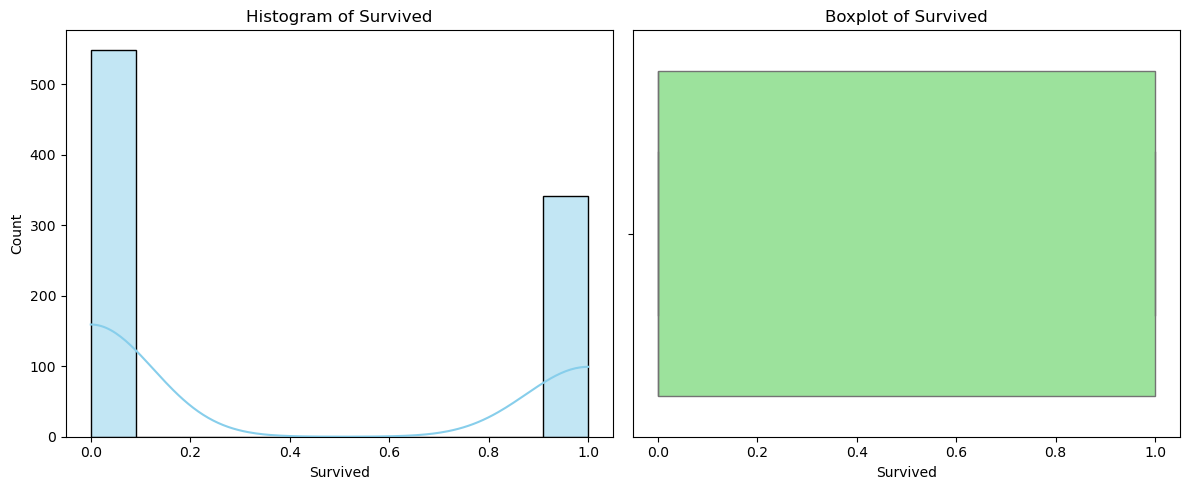

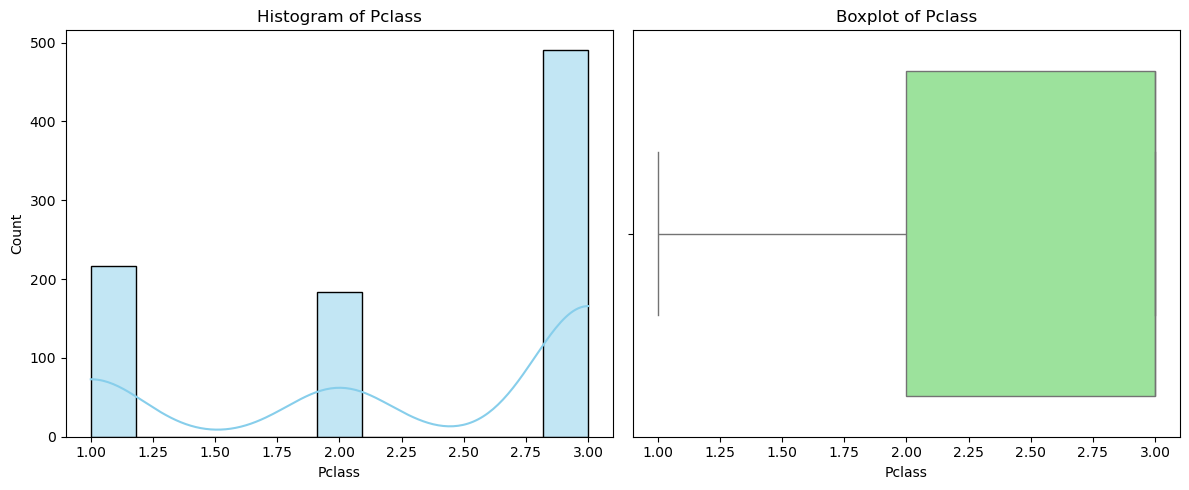

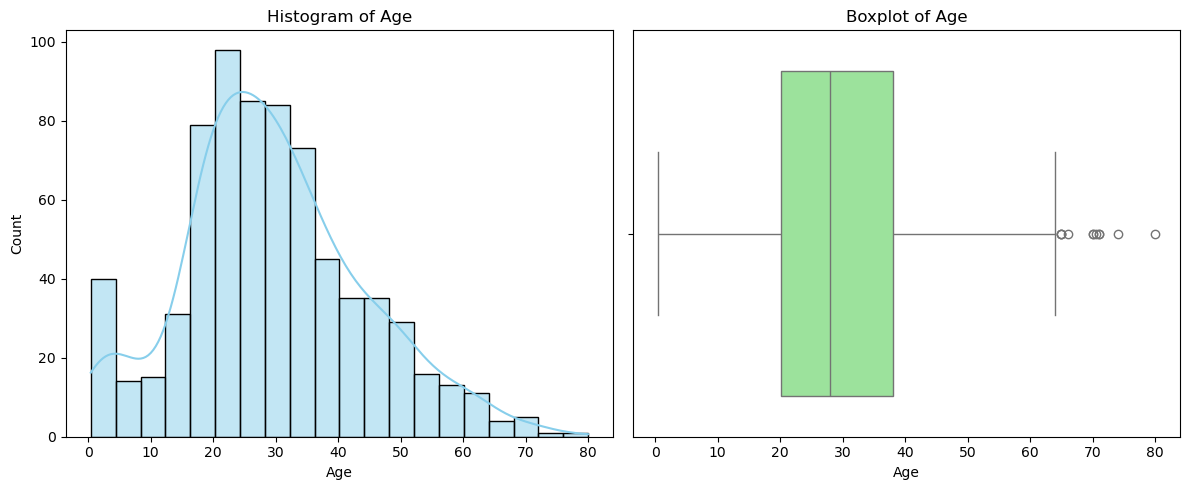

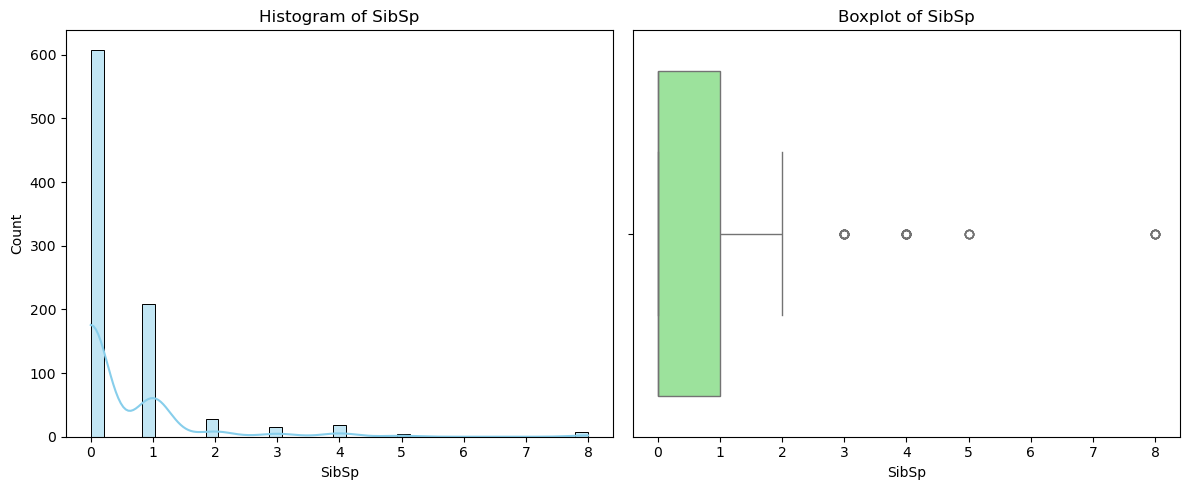

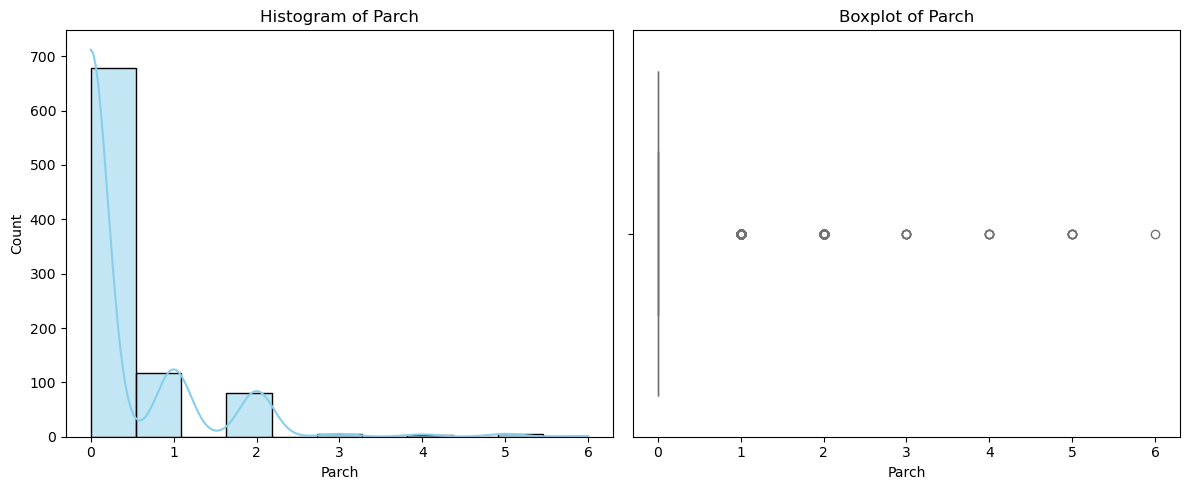

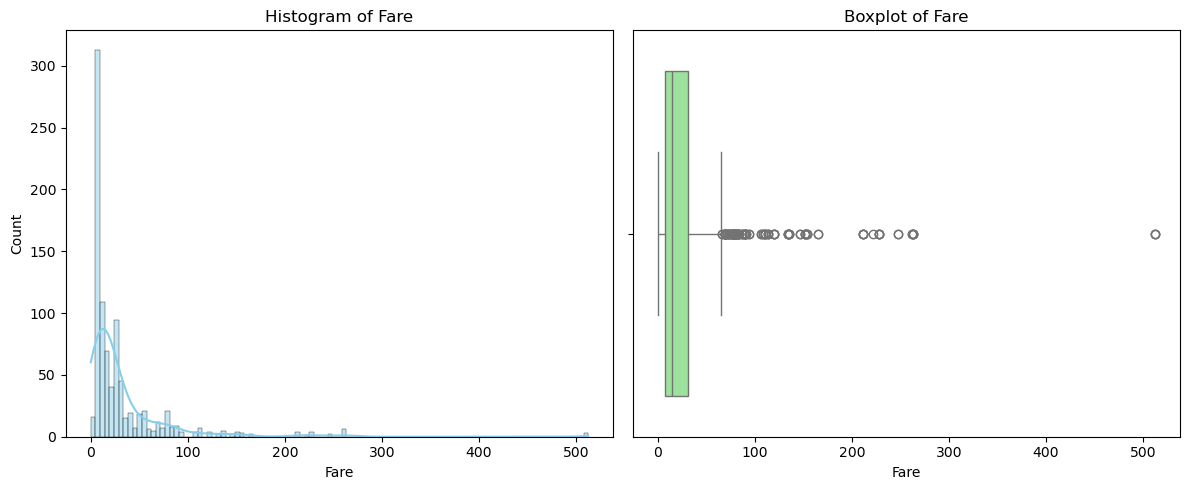

In [6]:

# 2. Create histograms and boxplots for numeric features
numeric_cols = df.select_dtypes(include=np.number).columns

print("\nGenerating histograms and boxplots...")

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()



Generating pairplot and correlation matrix...


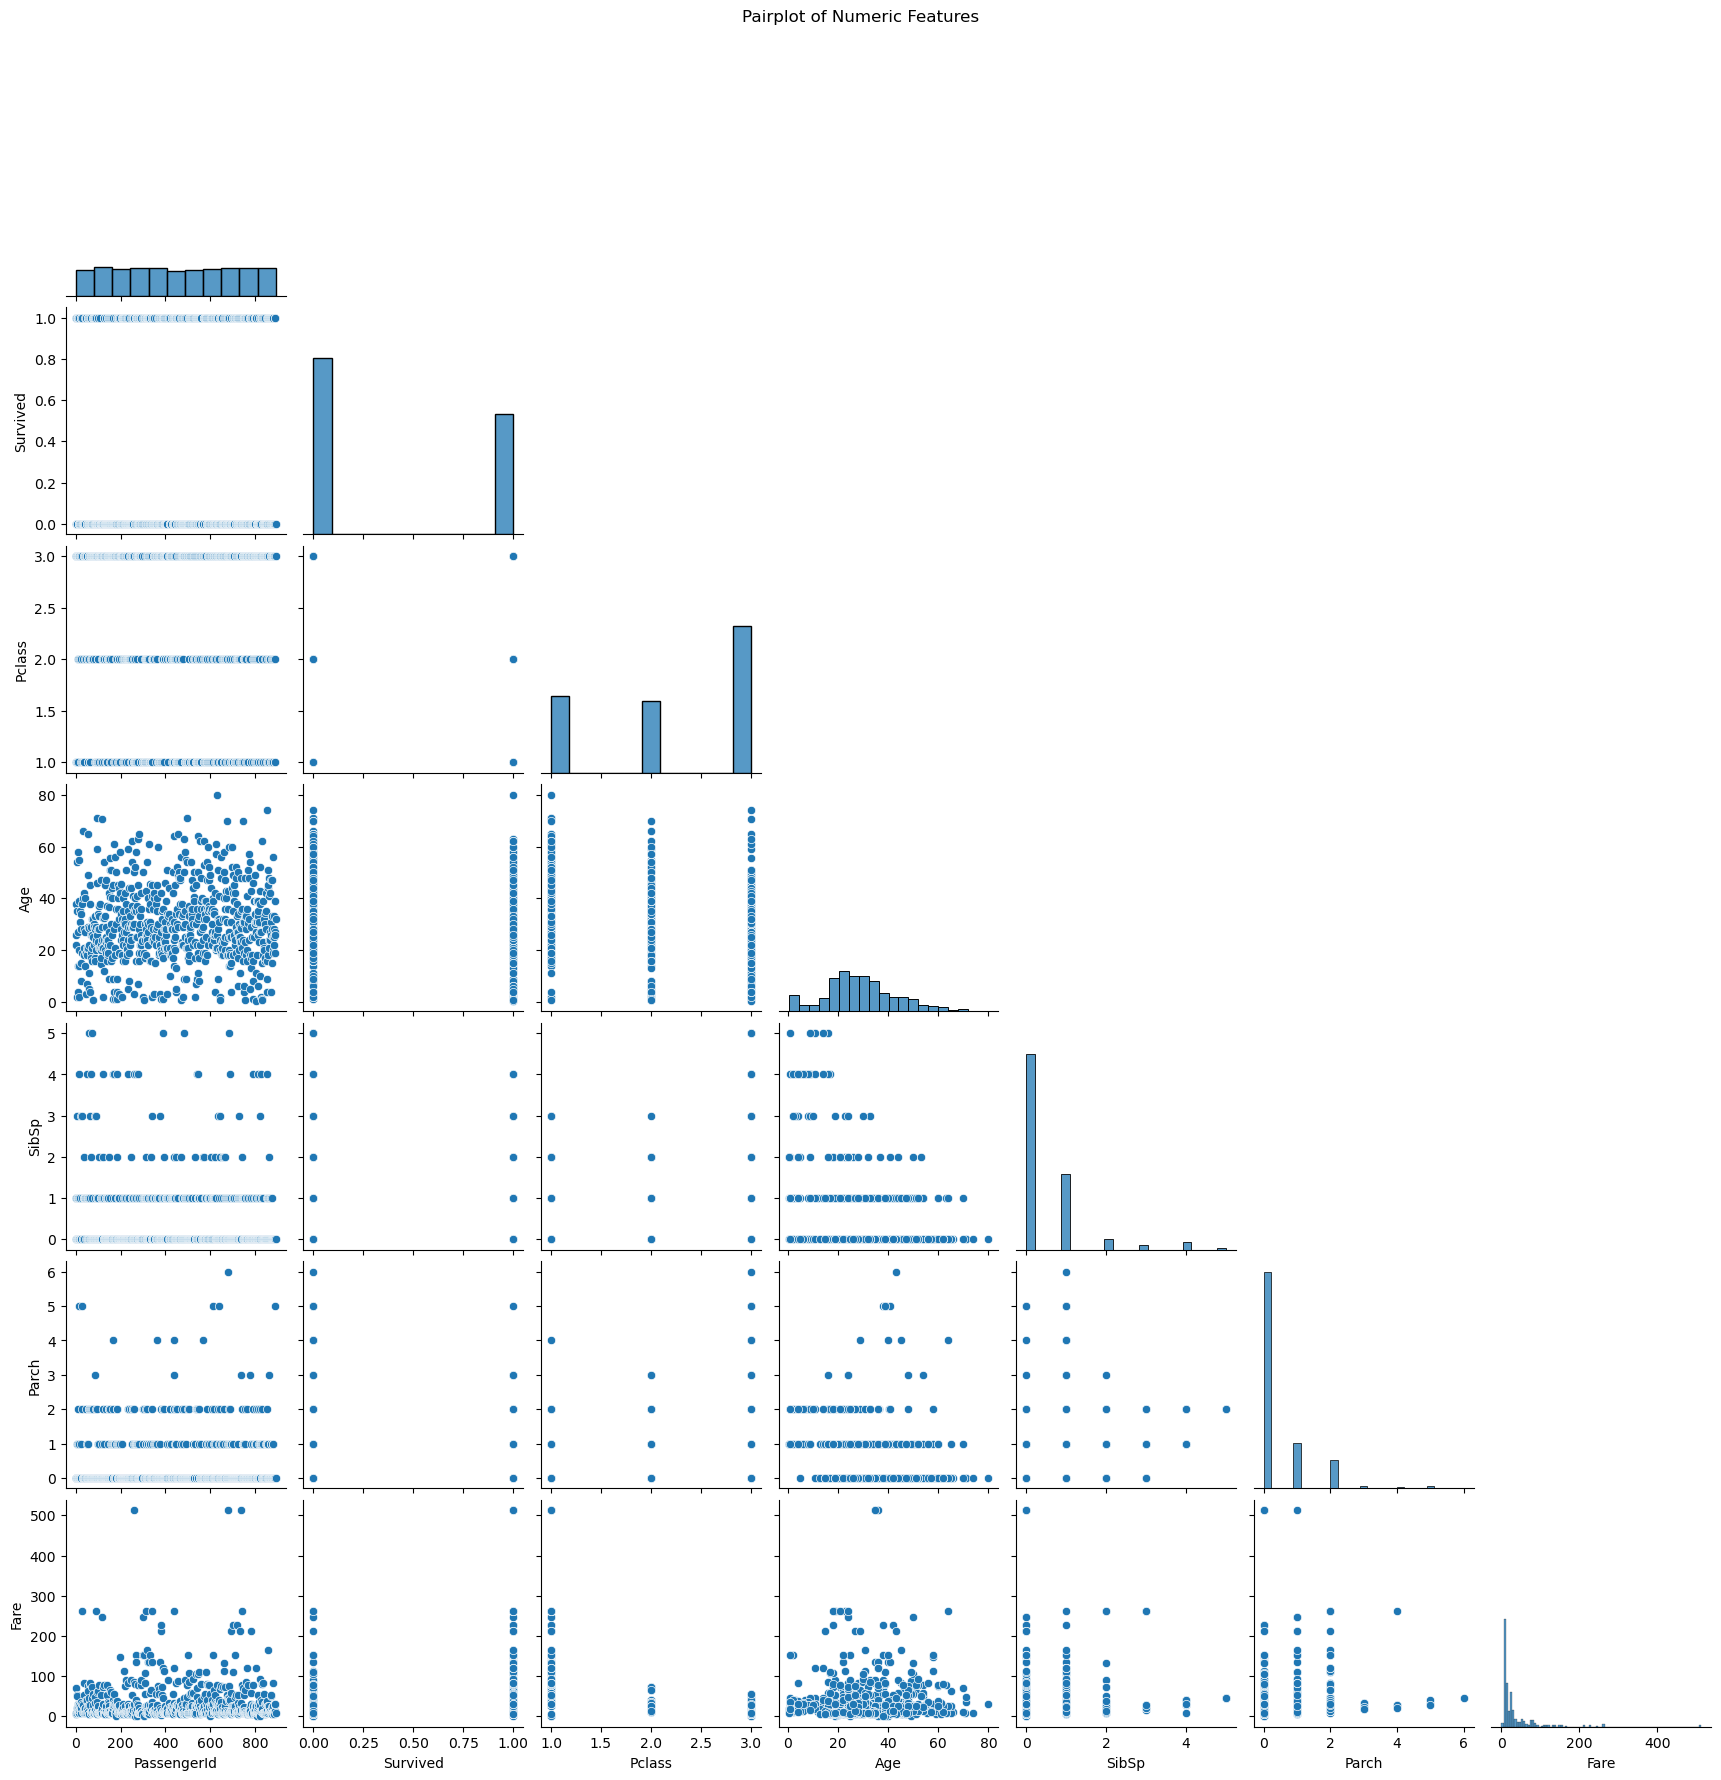

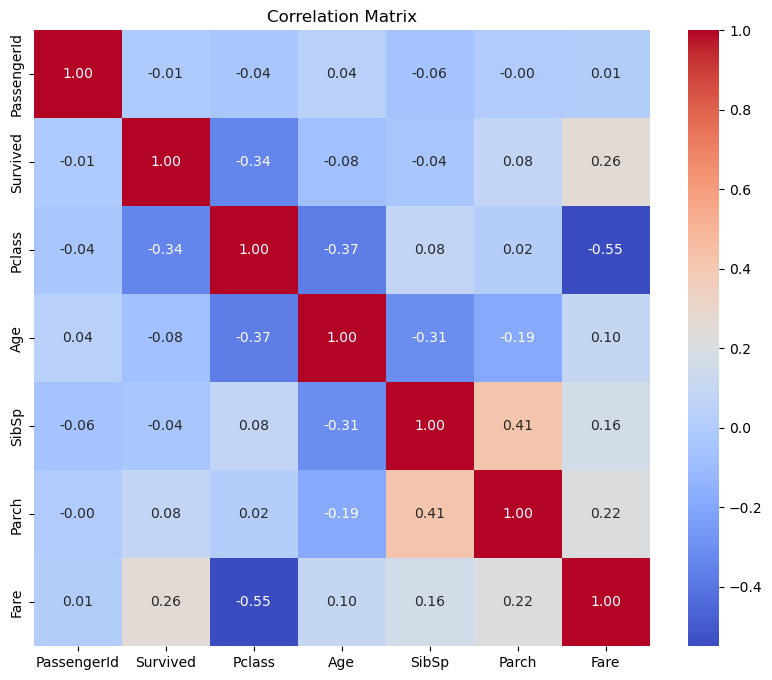

In [7]:

# 3. Pairplot and correlation matrix
print("\nGenerating pairplot and correlation matrix...")

sns.pairplot(df[numeric_cols].dropna(), corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


In [8]:

# 4. Identify patterns, trends, or anomalies
print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nFinding potential outliers using IQR method:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} potential outliers")



Checking for missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding potential outliers using IQR method:
PassengerId: 0 potential outliers
Survived: 0 potential outliers
Pclass: 0 potential outliers
Age: 11 potential outliers
SibSp: 46 potential outliers
Parch: 213 potential outliers
Fare: 116 potential outliers



Generating plots using Seaborn and Matplotlib...


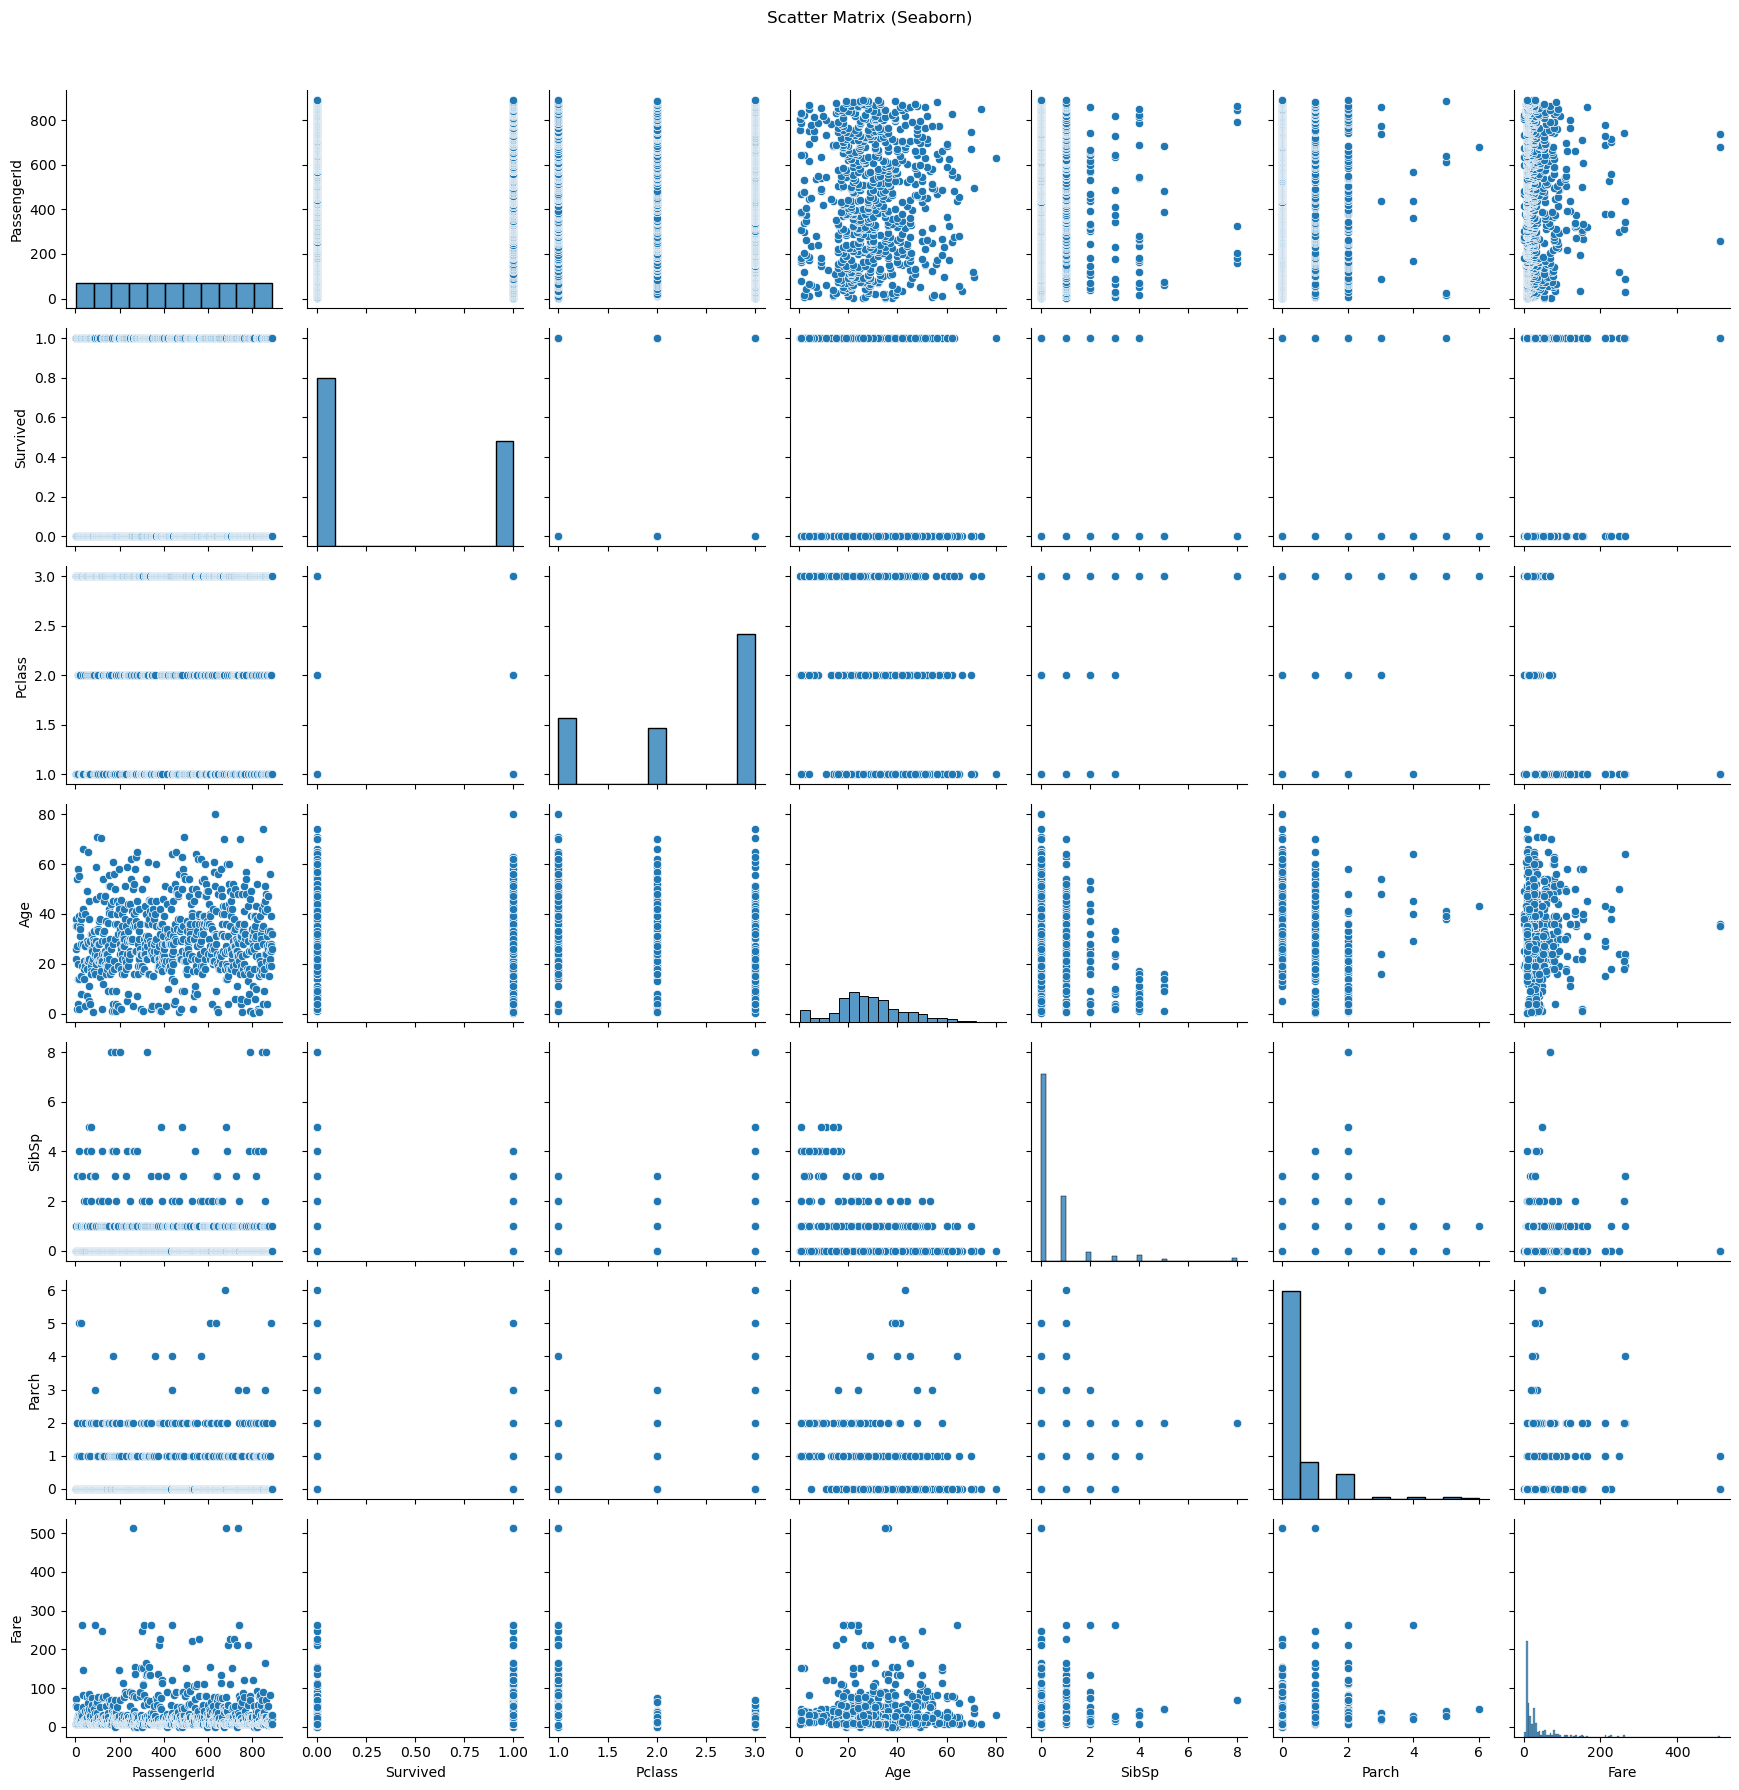

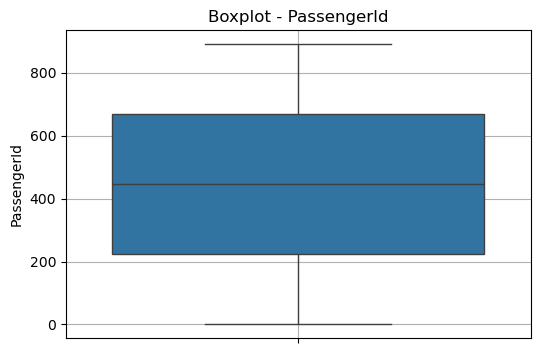

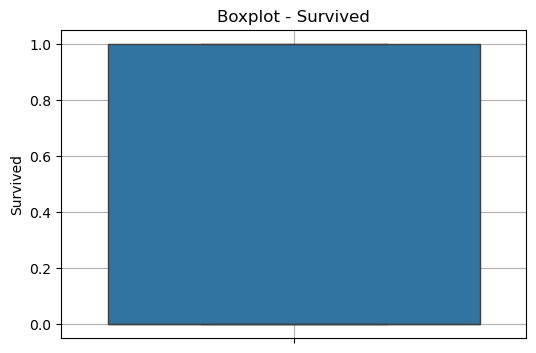

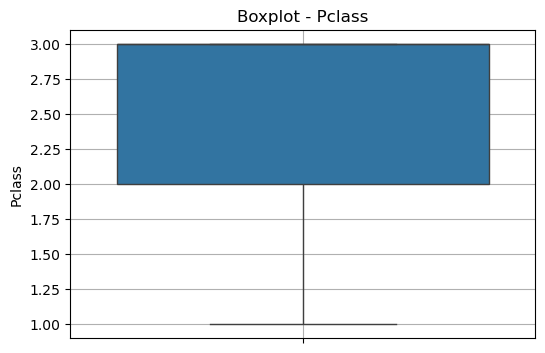

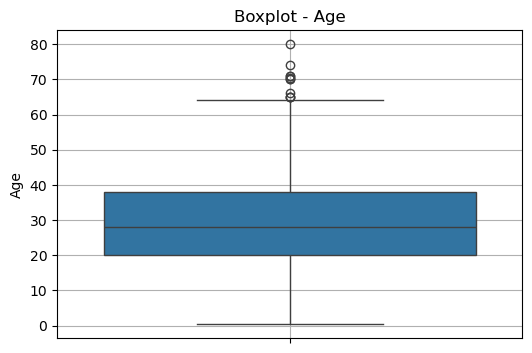

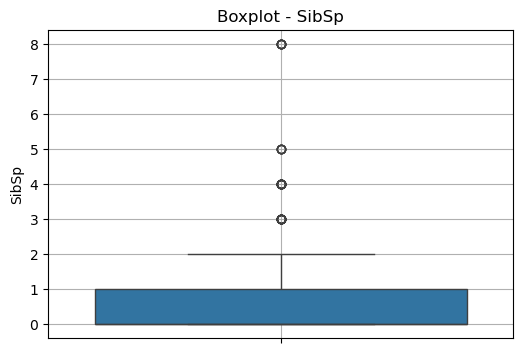

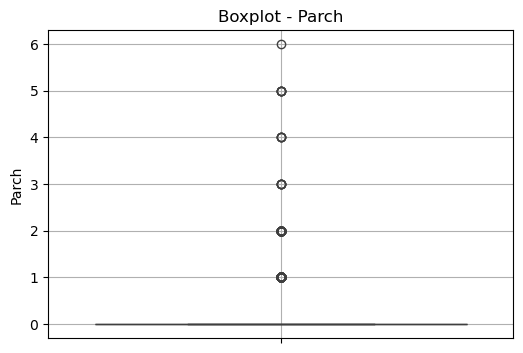

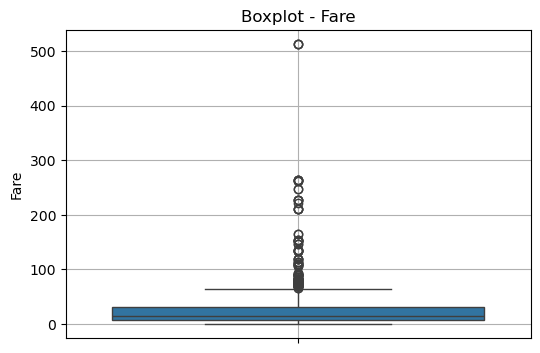

In [10]:
# 5. Scatter matrix and boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots appear inline if you're in Jupyter
%matplotlib inline

# Scatter Matrix using Seaborn Pairplot
print("\nGenerating plots using Seaborn and Matplotlib...")

sns.pairplot(df[numeric_cols])
plt.suptitle("Scatter Matrix (Seaborn)", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
    plt.grid(True)
    plt.show()